# Capstone Project

In [1]:
import numpy as np
import pandas as pd

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


### Clustering Neighborhoods in the city of Toronto, Canada

In [3]:
from bs4 import BeautifulSoup
import requests

In [4]:
URL = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

html_content = requests.get(URL).text

In [5]:
soup = BeautifulSoup(html_content, 'html.parser')

In [6]:
import re
html_data = soup.tbody.find_all('p')
neighborhood_data = []
for i in range(len(html_data)):
    temp = html_data[i].span.get_text()
    if temp != 'Not assigned':  
        results = re.split(r'[(,/]',temp.rstrip(')'))
        borough = results[0].strip()
        neighborhoods = results[1:]
        for j in range(len(neighborhoods)):
            pocket = {}
            pocket['PostalCode'] = html_data[i].b.get_text()
            pocket['Borough'] = borough    
            pocket['Neighborhoods'] = neighborhoods[j].strip()
            neighborhood_data.append(pocket)
neighborhood_data

[{'PostalCode': 'M3A', 'Borough': 'North York', 'Neighborhoods': 'Parkwoods'},
 {'PostalCode': 'M4A',
  'Borough': 'North York',
  'Neighborhoods': 'Victoria Village'},
 {'PostalCode': 'M5A',
  'Borough': 'Downtown Toronto',
  'Neighborhoods': 'Regent Park'},
 {'PostalCode': 'M5A',
  'Borough': 'Downtown Toronto',
  'Neighborhoods': 'Harbourfront'},
 {'PostalCode': 'M6A',
  'Borough': 'North York',
  'Neighborhoods': 'Lawrence Manor'},
 {'PostalCode': 'M6A',
  'Borough': 'North York',
  'Neighborhoods': 'Lawrence Heights'},
 {'PostalCode': 'M7A',
  'Borough': "Queen's Park",
  'Neighborhoods': 'Ontario Provincial Government'},
 {'PostalCode': 'M9A',
  'Borough': 'Etobicoke',
  'Neighborhoods': 'Islington Avenue'},
 {'PostalCode': 'M1B', 'Borough': 'Scarborough', 'Neighborhoods': 'Malvern'},
 {'PostalCode': 'M1B', 'Borough': 'Scarborough', 'Neighborhoods': 'Rouge'},
 {'PostalCode': 'M3B',
  'Borough': 'North York',
  'Neighborhoods': 'Don Mills)North'},
 {'PostalCode': 'M4B',
  'Borough

In [7]:
toronto_data = pd.DataFrame(neighborhood_data)

In [8]:
toronto_data

,PostalCode,Borough,Neighborhoods
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park
3,M5A,Downtown Toronto,Harbourfront
4,M6A,North York,Lawrence Manor
...,...,...,...
213,M8Z,Etobicoke,Mimico NW
214,M8Z,Etobicoke,The Queensway West
215,M8Z,Etobicoke,South of Bloor
216,M8Z,Etobicoke,Kingsway Park South West


In [9]:
import csv
import urllib.request

COORDS_DOWNLOAD_URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv'
response = urllib.request.urlopen(COORDS_DOWNLOAD_URL)
lat_lng_coords = pd.read_csv(response)

In [10]:
lat_lng_coords.rename(columns={'Postal Code':'PostalCode'},inplace=True)

In [11]:
toronto_data_with_coords = pd.merge(toronto_data, lat_lng_coords, how='left')

In [12]:
toronto_data_with_coords

,PostalCode,Borough,Neighborhoods,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636
3,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
4,M6A,North York,Lawrence Manor,43.718518,-79.464763
...,...,...,...,...,...
213,M8Z,Etobicoke,Mimico NW,43.628841,-79.520999
214,M8Z,Etobicoke,The Queensway West,43.628841,-79.520999
215,M8Z,Etobicoke,South of Bloor,43.628841,-79.520999
216,M8Z,Etobicoke,Kingsway Park South West,43.628841,-79.520999


### Explore Neighborhoods in Downtown Toronto

In [61]:
downtown_toronto = toronto_data_with_coords[toronto_data_with_coords['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
downtown_toronto

,PostalCode,Borough,Neighborhoods,Latitude,Longitude
0,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636
1,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
2,M5B,Downtown Toronto,Garden District,43.657162,-79.378937
3,M5B,Downtown Toronto,Ryerson,43.657162,-79.378937
4,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
5,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
6,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
7,M6G,Downtown Toronto,Christie,43.669542,-79.422564
8,M5H,Downtown Toronto,Richmond,43.650571,-79.384568
9,M5H,Downtown Toronto,Adelaide,43.650571,-79.384568


In [62]:
downtown_toronto['Neighborhoods'].value_counts()

St. James Town             2
Christie                   1
Berczy Park                1
CN Tower                   1
King and Spadina           1
Regent Park                1
Grange Park                1
Richmond                   1
Chinatown                  1
Bathurst Quay              1
Harbord                    1
Victoria Hotel             1
Kensington Market          1
Harbourfront               1
Union Station              1
Toronto Islands            1
Cabbagetown                1
Toronto Dominion Centre    1
Design Exchange            1
Harbourfront West          1
Adelaide                   1
Church and Wellesley       1
First Canadian Place       1
King                       1
Commerce Court             1
Central Bay Street         1
Rosedale                   1
University of Toronto      1
Underground city           1
Garden District            1
Railway Lands              1
Harbourfront East          1
South Niagara              1
Ryerson                    1
Island airport

https://postalcodeinfo.ca/postal-codes-by-city/on/downtown-toronto-st-james-town-cabbagetown/

In [63]:
downtown_toronto.drop(index=4,axis=0,inplace=True)

In [64]:
downtown_toronto_sorted = downtown_toronto.sort_values('Neighborhoods').reset_index(drop=True)

In [65]:
downtown_toronto_sorted

,PostalCode,Borough,Neighborhoods,Latitude,Longitude
0,M5H,Downtown Toronto,Adelaide,43.650571,-79.384568
1,M5V,Downtown Toronto,Bathurst Quay,43.628947,-79.394420
2,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
3,M5V,Downtown Toronto,CN Tower,43.628947,-79.394420
4,M4X,Downtown Toronto,Cabbagetown,43.667967,-79.367675
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
6,M5T,Downtown Toronto,Chinatown,43.653206,-79.400049
7,M6G,Downtown Toronto,Christie,43.669542,-79.422564
8,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
9,M5L,Downtown Toronto,Commerce Court,43.648198,-79.379817


In [66]:
downtown_toronto_latitude = 43.6548
downtown_toronto_longitude = -79.3883

In [67]:
r_diff = np.random.randint(1,10,len(downtown_toronto_sorted['Latitude']))

In [68]:
r_diff = r_diff*0.0002

In [69]:
import folium

map_toronto = folium.Map(location=[downtown_toronto_latitude,downtown_toronto_longitude], zoom_start=12.5)

for lat, lng, label in zip(downtown_toronto_sorted['Latitude']+r_diff, downtown_toronto_sorted['Longitude']+r_diff, downtown_toronto_sorted['Neighborhoods']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=1,
        parse_html=False).add_to(map_toronto)  

map_toronto

In [70]:
# define Foursquare Credentials and Version
CLIENT_ID = 'LEDK5OOKF4IRDV30JKIFZ0B1T5T3CRTN1PAFIEDI3XUACT5C' # your Foursquare ID
CLIENT_SECRET = 'DEK45GQV3YIOEKRFKYZ04FAVVYSQ1MCZFF1L54UAVKNJUZ3I' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LEDK5OOKF4IRDV30JKIFZ0B1T5T3CRTN1PAFIEDI3XUACT5C
CLIENT_SECRET:DEK45GQV3YIOEKRFKYZ04FAVVYSQ1MCZFF1L54UAVKNJUZ3I


In [71]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhoods', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [72]:
downtown_toronto_venues = getNearbyVenues(downtown_toronto_sorted['Neighborhoods'],
                                          downtown_toronto_sorted['Latitude'],
                                          downtown_toronto_sorted['Longitude'])

Adelaide
Bathurst Quay
Berczy Park
CN Tower
Cabbagetown
Central Bay Street
Chinatown
Christie
Church and Wellesley
Commerce Court
Design Exchange
First Canadian Place
Garden District
Grange Park
Harbord
Harbourfront
Harbourfront East
Harbourfront West
Island airport
Kensington Market
King
King and Spadina
Railway Lands
Regent Park
Richmond
Rosedale
Ryerson
South Niagara
St. James Town
Toronto Dominion Centre
Toronto Islands
Underground city
Union Station
University of Toronto
Victoria Hotel


In [73]:
downtown_toronto_venues.head()

,Neighborhoods,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adelaide,43.650571,-79.384568,Nathan Phillips Square,43.652270,-79.383516,Plaza
1,Adelaide,43.650571,-79.384568,Four Seasons Centre for the Performing Arts,43.650592,-79.385806,Concert Hall
2,Adelaide,43.650571,-79.384568,Rosalinda,43.650252,-79.385156,Vegetarian / Vegan Restaurant
3,Adelaide,43.650571,-79.384568,The Keg Steakhouse + Bar - York Street,43.649987,-79.384103,Restaurant
4,Adelaide,43.650571,-79.384568,Hy's Steakhouse,43.649505,-79.382919,Steakhouse


In [74]:
downtown_toronto_venues[['Neighborhoods','Venue']].groupby('Neighborhoods').count().sort_values('Venue',ascending=False)

,Venue
Neighborhoods,
Victoria Hotel,100
Harbourfront East,100
Union Station,100
Underground city,100
Toronto Islands,100
Toronto Dominion Centre,100
Ryerson,100
Commerce Court,100
Design Exchange,100


In [108]:
downtown_toronto_venues_total = downtown_toronto_venues[['Neighborhoods','Venue']].groupby('Neighborhoods').count().reset_index()
downtown_toronto_venues_total.head()

,Neighborhoods,Venue
0,Adelaide,92
1,Bathurst Quay,16
2,Berczy Park,59
3,CN Tower,16
4,Cabbagetown,46


In [75]:
import matplotlib.pyplot as plt

In [76]:
dt_venues_grouped = downtown_toronto_venues[['Neighborhoods','Venue','Venue Category']].groupby(by=['Neighborhoods','Venue Category'])\
                                                                   .count().reset_index()
dt_venues_grouped.head()

,Neighborhoods,Venue Category,Venue
0,Adelaide,American Restaurant,2
1,Adelaide,Art Gallery,1
2,Adelaide,Art Museum,1
3,Adelaide,Asian Restaurant,1
4,Adelaide,Bakery,2


([<matplotlib.patches.Wedge at 0x7fb2c00cb950>,
 [Text(1.0769924969060731, 0.22380161216582511, 'Coffee Shop'),
  Text(0.8986668861848762, 0.6343483488390104, 'Café'),
  Text(0.6343483593564188, 0.8986668787608787, 'Italian Restaurant'),
  Text(0.368367573915492, 1.036487014143262, 'Bakery'),
  Text(0.07506664967535517, 1.097435646453366, 'Pharmacy'),
  Text(-0.22380162477023938, 1.0769924942868456, 'Pizza Place'),
  Text(-0.506071555916447, 0.9766737327748231, 'Pub'),
  Text(-0.7508084734941436, 0.8039195458062915, 'Restaurant'),
  Text(-0.9398613592515239, 0.5715423216052142, 'Chinese Restaurant'),
  Text(-1.0364870249210931, 0.3683675435895801, 'Liquor Store'),
  Text(-1.076992503454141, 0.22380158065478944, 'Sandwich Place'),
  Text(-1.097435648649693, 0.07506661756618609, 'Plaza'),
  Text(-1.0974356433785073, -0.07506669462819147, 'Playground'),
  Text(-1.0769924877387764, -0.22380165628127496, 'Snack Place'),
  Text(-1.036486999054297, -0.36836761637176785, 'Sushi Restaurant'),
 

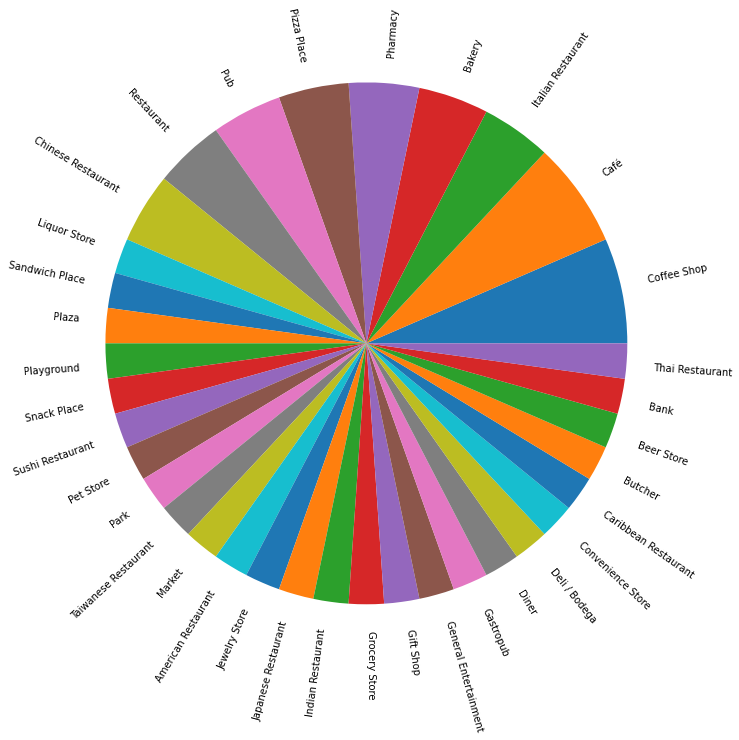

In [77]:
SJT_venues = dt_venues_grouped[dt_venues_grouped['Neighborhoods'] == 'St. James Town'].sort_values('Venue',ascending=False)
plt.figure(figsize=(20,12))
plt.pie(SJT_venues['Venue'],labels=SJT_venues['Venue Category'],rotatelabels=90)

([<matplotlib.patches.Wedge at 0x7fb2c8193490>,
 [Text(6.735557395310444e-17, 1.1, 'Park'),
  Text(-0.7778174593052025, -0.7778174593052023, 'Playground'),
  Text(0.7778174593052023, -0.7778174593052025, 'Trail')])

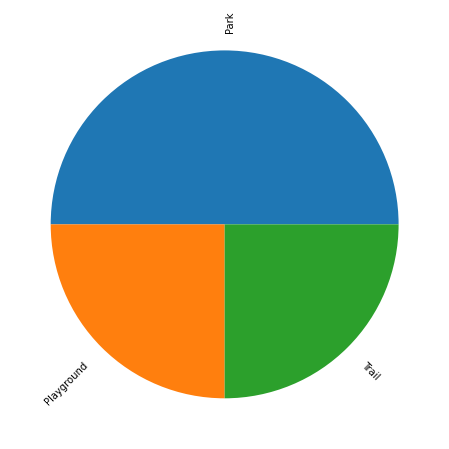

In [78]:
RD_venues = dt_venues_grouped[dt_venues_grouped['Neighborhoods'] == 'Rosedale'].sort_values('Venue',ascending=False)
plt.figure(figsize=(14,8))
plt.pie(RD_venues['Venue'],labels=RD_venues['Venue Category'],rotatelabels=90)

In [79]:
downtown_toronto_venues[['Venue Category']]
downtown_toronto_venues[downtown_toronto_venues['Venue Category']=='Neighborhood']

,Neighborhoods,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
6,Adelaide,43.650571,-79.384568,Downtown Toronto,43.653232,-79.385296,Neighborhood
990,Harbourfront East,43.640816,-79.381752,Harbourfront,43.639526,-79.380688,Neighborhood
1191,King,43.650571,-79.384568,Downtown Toronto,43.653232,-79.385296,Neighborhood
1360,Richmond,43.650571,-79.384568,Downtown Toronto,43.653232,-79.385296,Neighborhood
1712,Toronto Islands,43.640816,-79.381752,Harbourfront,43.639526,-79.380688,Neighborhood
1912,Union Station,43.640816,-79.381752,Harbourfront,43.639526,-79.380688,Neighborhood


In [80]:
import sklearn
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
downtown_toronto_onehot = encoder.fit_transform(downtown_toronto_venues[['Venue Category']])
cat_col = np.unique(downtown_toronto_venues[['Venue Category']])
downtown_toronto_onehot = pd.DataFrame(downtown_toronto_onehot, columns=cat_col)
downtown_toronto_onehot.head()

,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
downtown_toronto_onehot = pd.concat([downtown_toronto_venues['Neighborhoods'],downtown_toronto_onehot],join='inner',axis=1)
downtown_toronto_onehot.head()

,Neighborhoods,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Adelaide,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Adelaide,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Adelaide,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Adelaide,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Adelaide,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
downtown_toronto_grouped = downtown_toronto_onehot.groupby('Neighborhoods').mean().reset_index()
downtown_toronto_grouped

,Neighborhoods,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Adelaide,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.021739,0.000000,...,0.010870,0.0000,0.00,0.00,0.010870,0.00000,0.000000,0.000000,0.000000,0.000000
1,Bathurst Quay,0.0000,0.0000,0.0625,0.0625,0.125,0.1875,0.125,0.000000,0.000000,...,0.000000,0.0000,0.00,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,Berczy Park,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,...,0.000000,0.0000,0.00,0.00,0.016949,0.00000,0.000000,0.000000,0.000000,0.000000
3,CN Tower,0.0000,0.0000,0.0625,0.0625,0.125,0.1875,0.125,0.000000,0.000000,...,0.000000,0.0000,0.00,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,Cabbagetown,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.021739,0.000000,...,0.000000,0.0000,0.00,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
5,Central Bay Street,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,...,0.000000,0.0000,0.00,0.00,0.016129,0.00000,0.000000,0.016129,0.000000,0.016129
6,Chinatown,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,...,0.000000,0.0000,0.00,0.00,0.047619,0.00000,0.047619,0.015873,0.000000,0.000000
7,Christie,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,...,0.000000,0.0000,0.00,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
8,Church and Wellesley,0.0125,0.0125,0.0000,0.0000,0.000,0.0000,0.000,0.012500,0.000000,...,0.012500,0.0125,0.00,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.025000
9,Commerce Court,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.030000,0.000000,...,0.000000,0.0000,0.00,0.00,0.020000,0.00000,0.000000,0.010000,0.000000,0.000000


/Users/johnnygong/opt/anaconda3/envs/home_bench/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


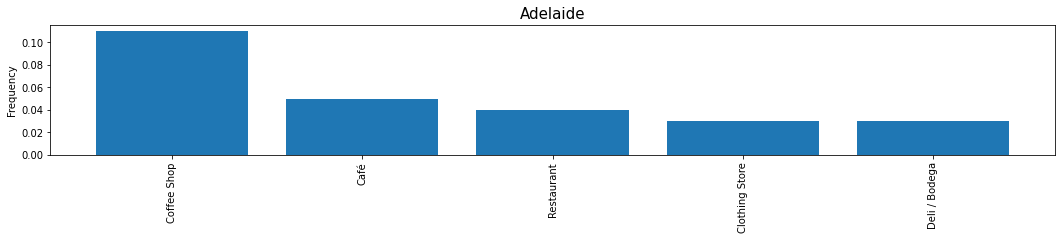

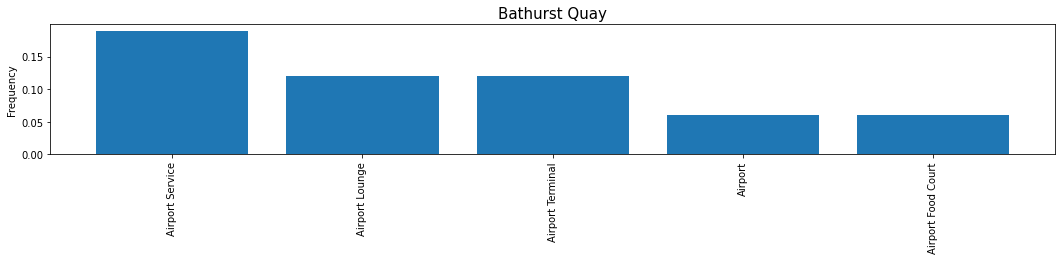

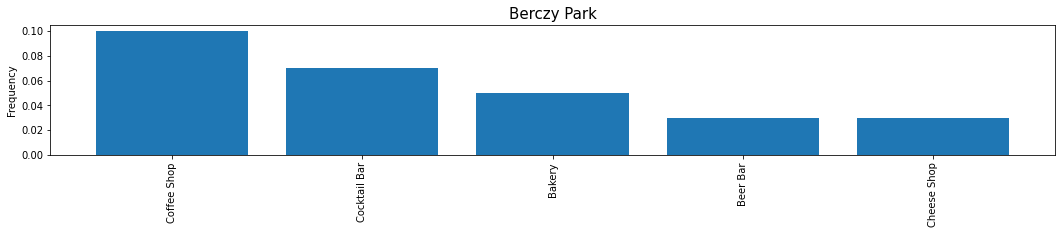

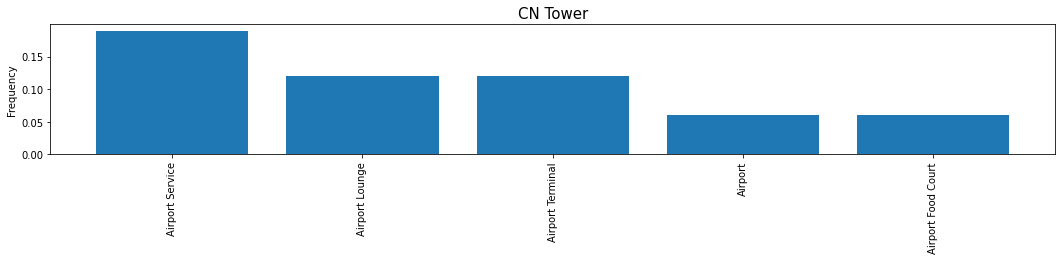

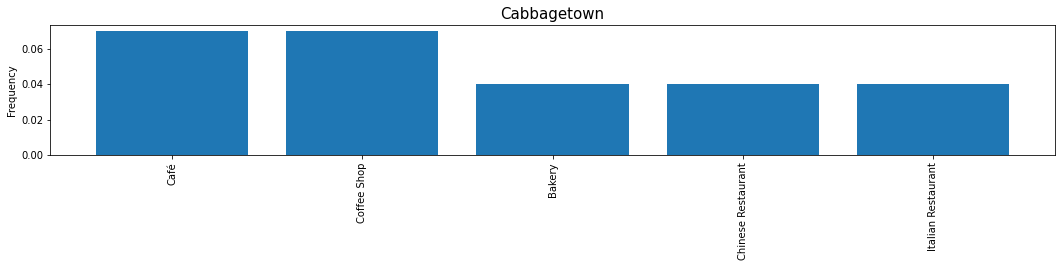

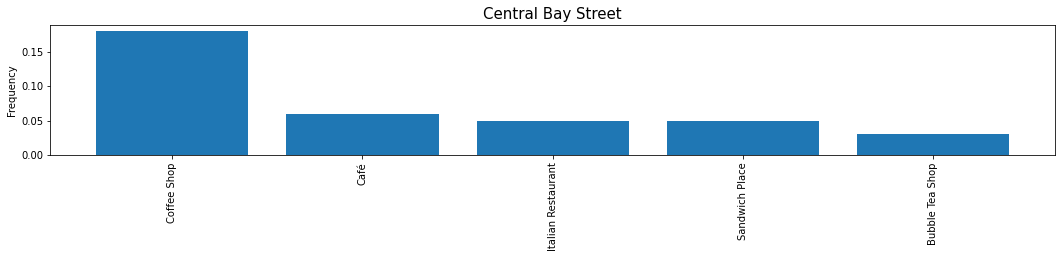

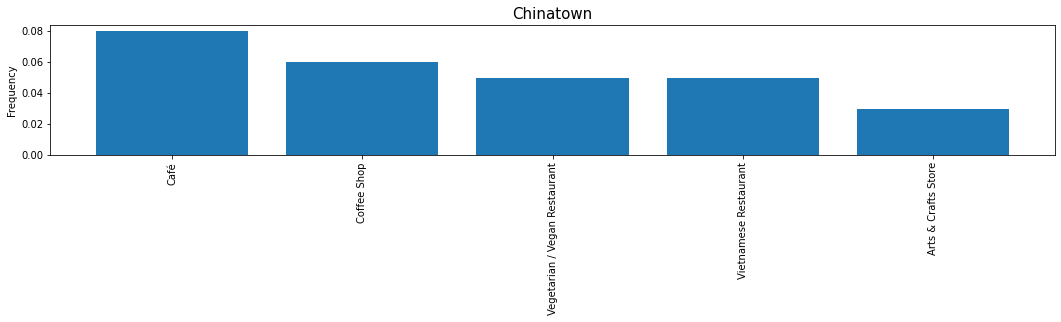

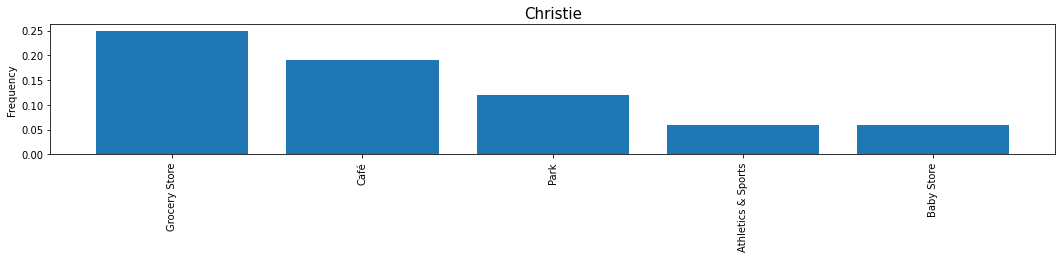

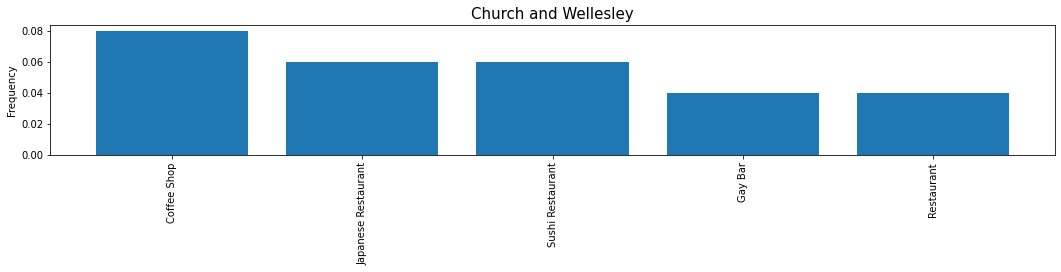

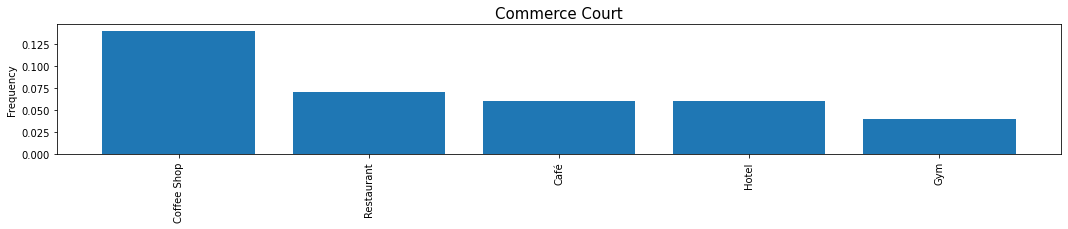

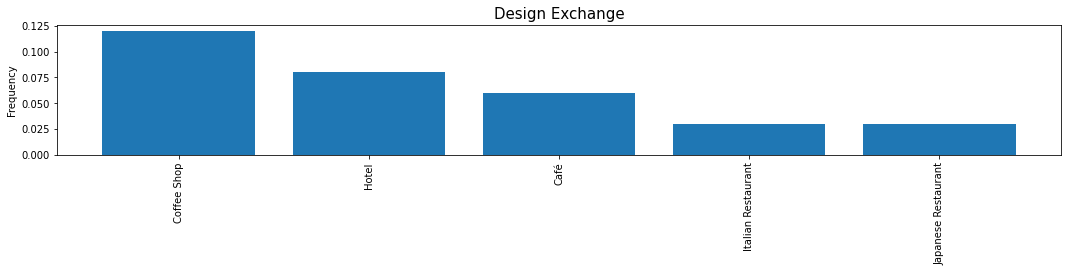

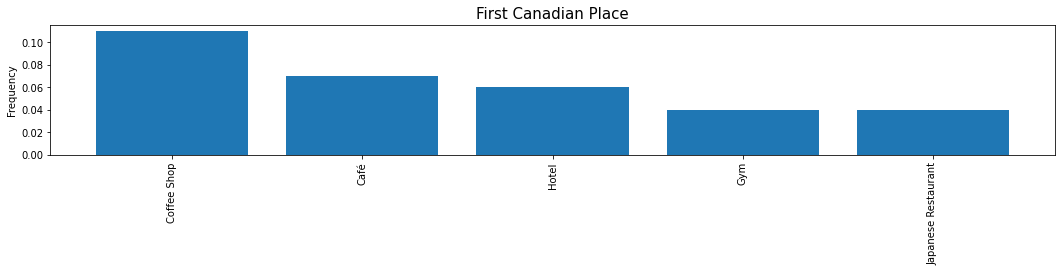

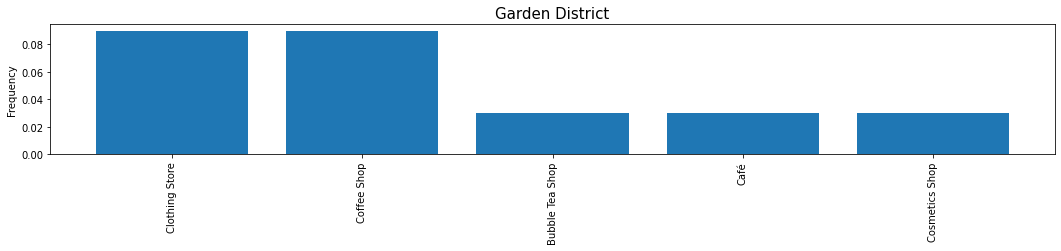

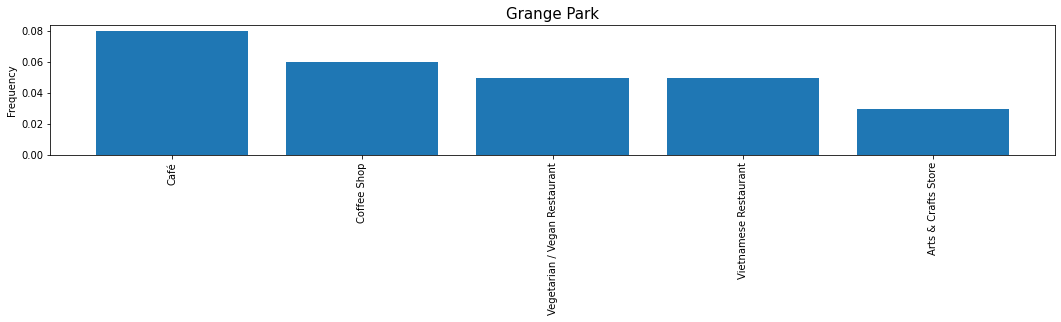

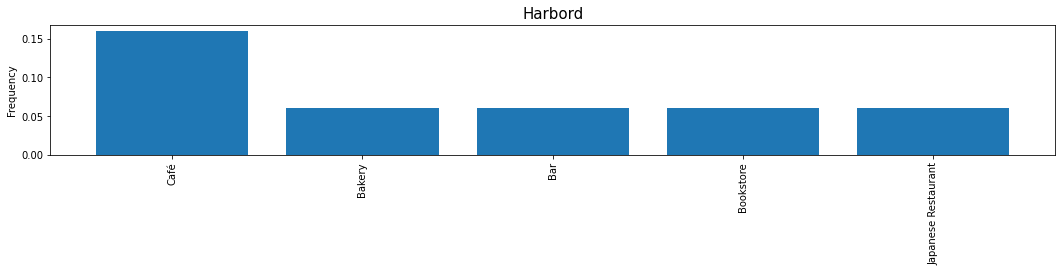

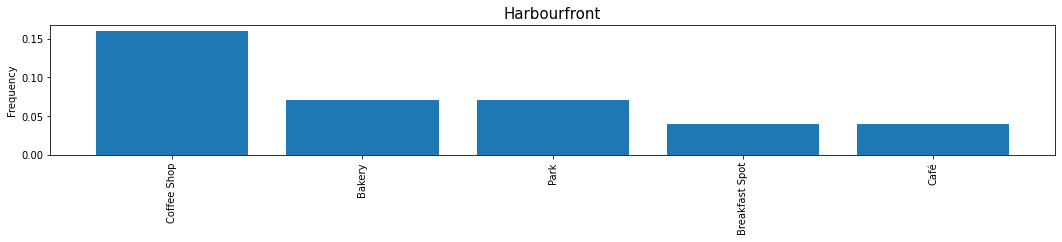

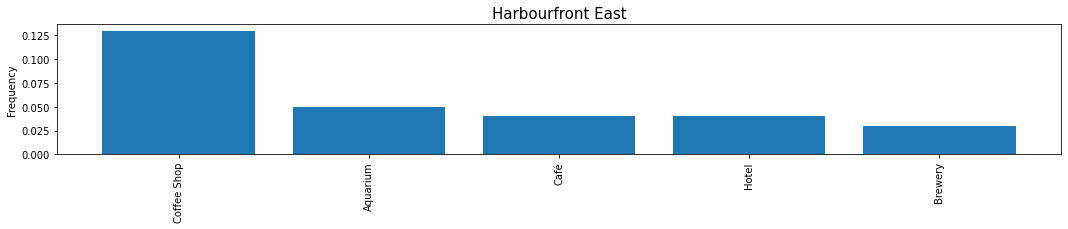

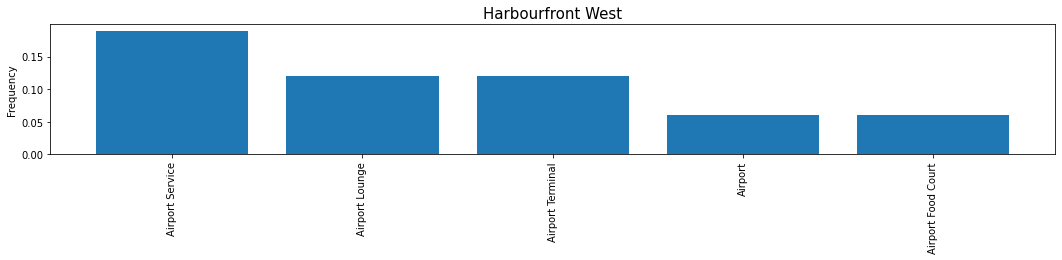

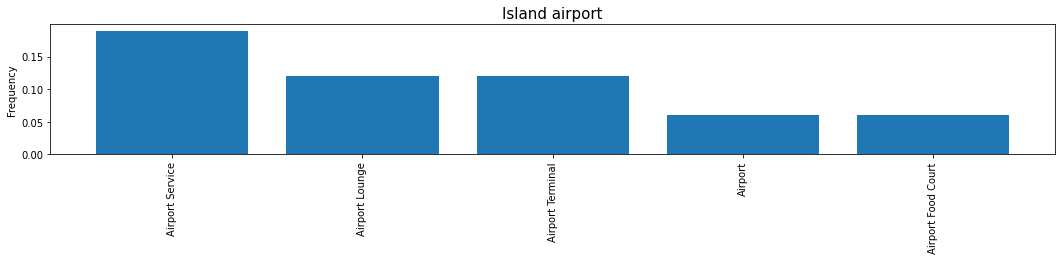

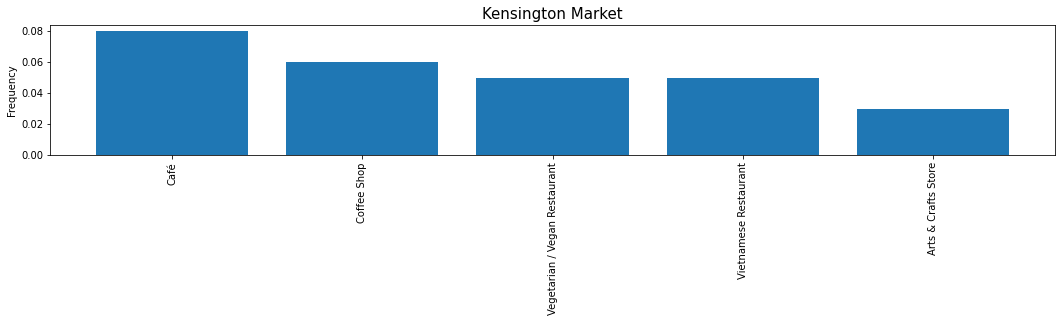

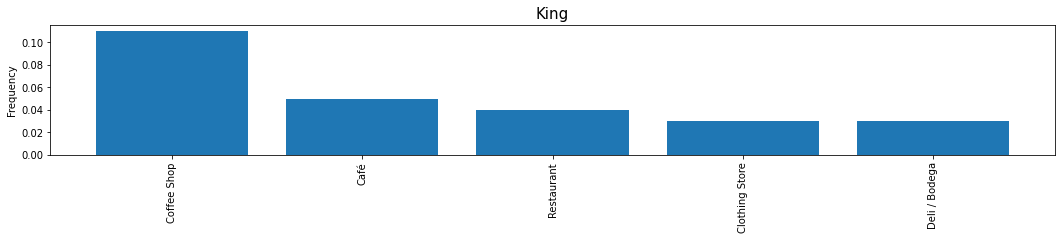

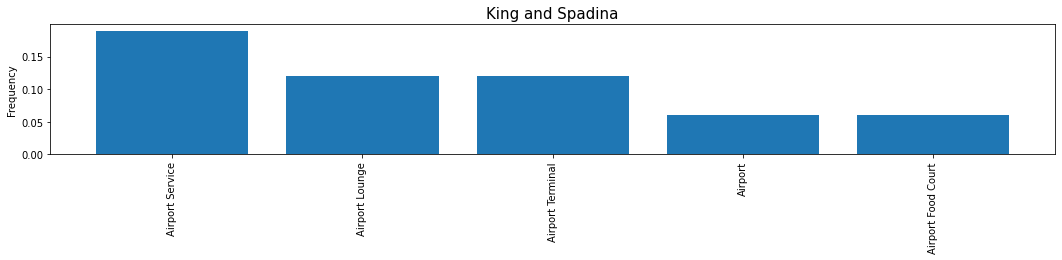

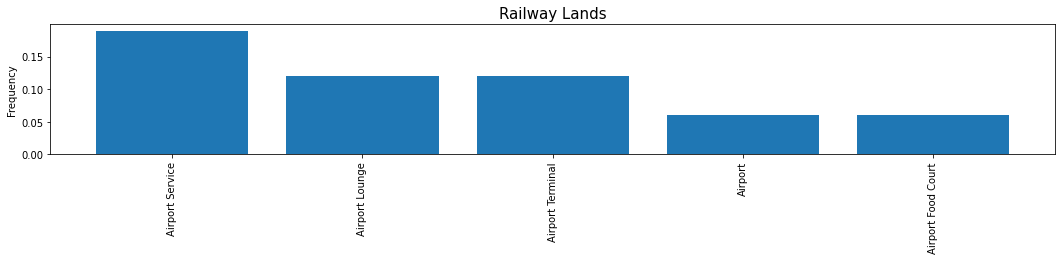

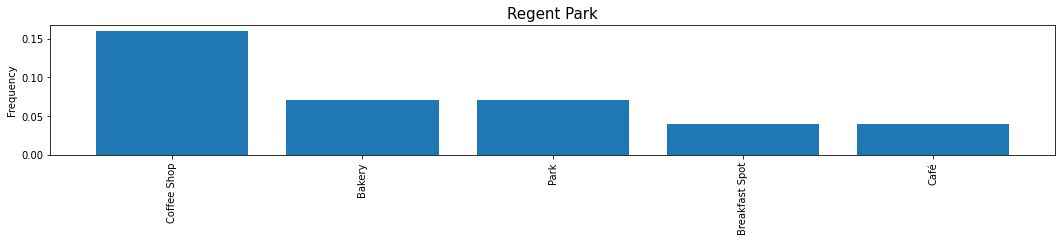

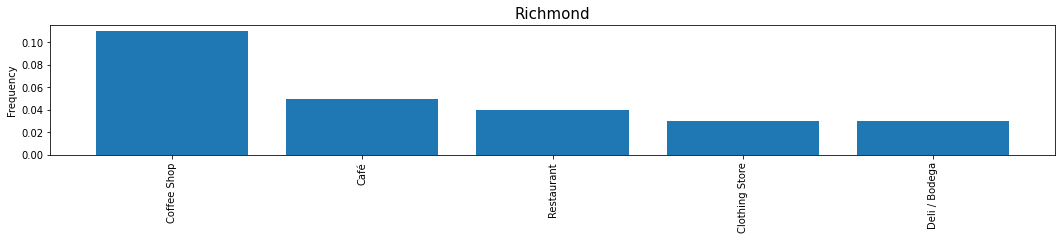

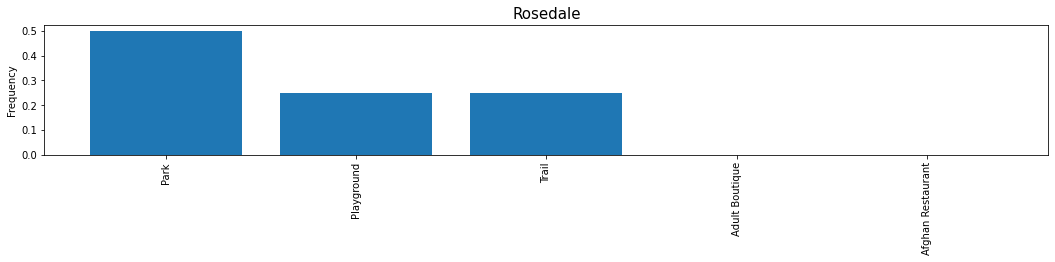

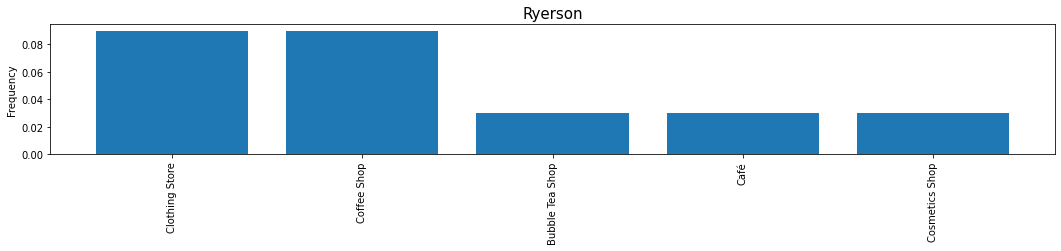

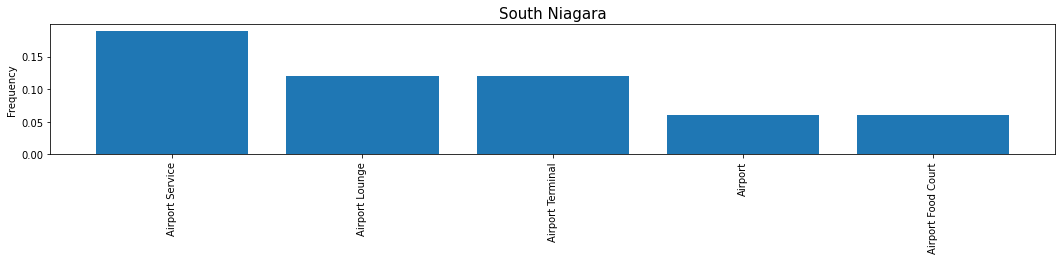

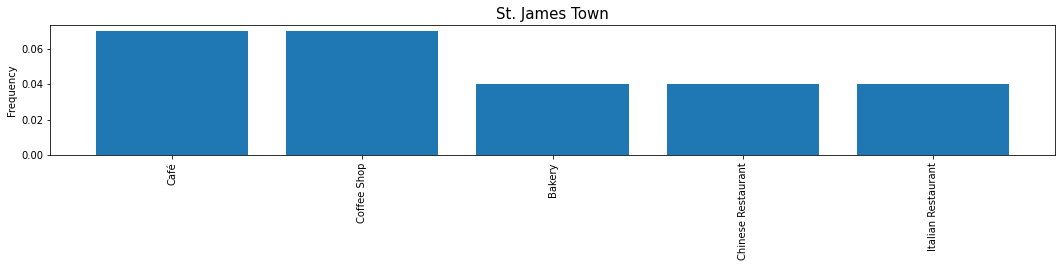

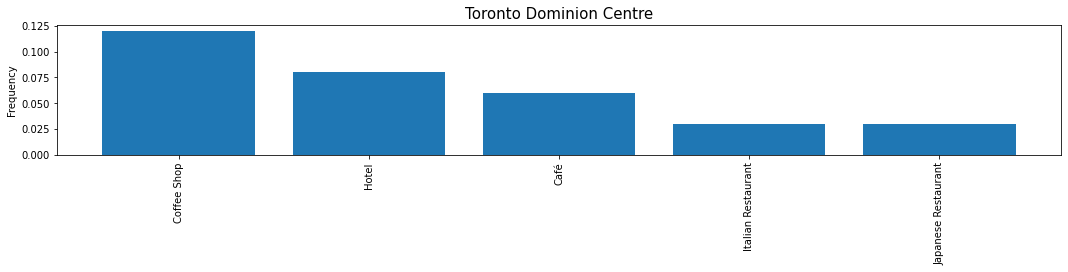

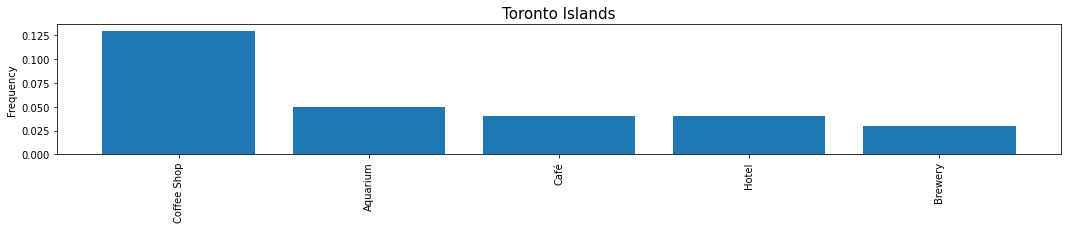

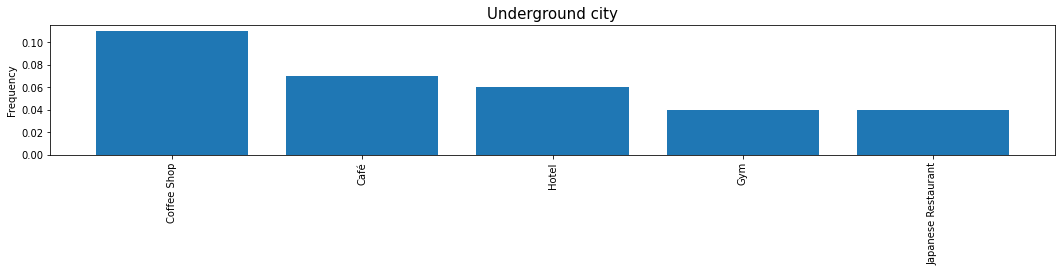

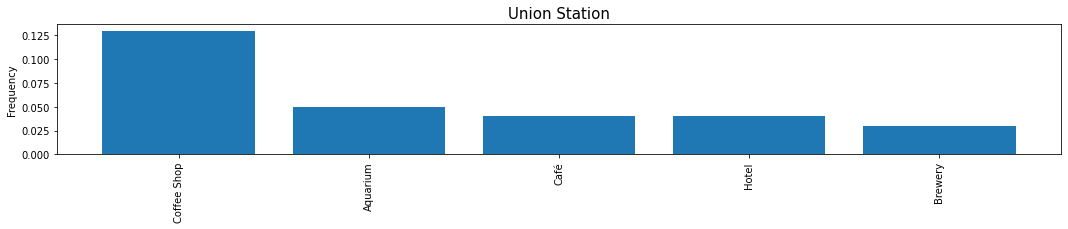

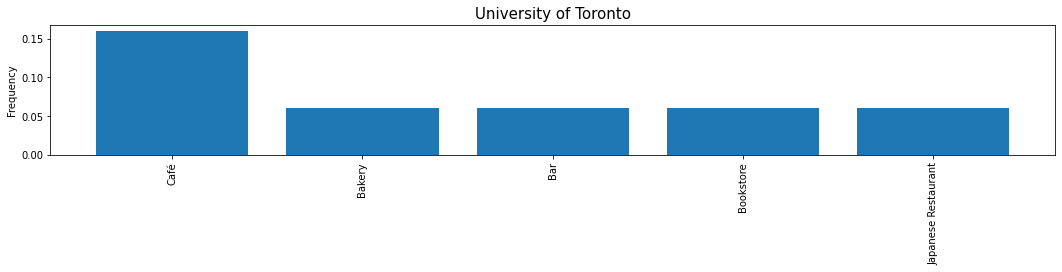

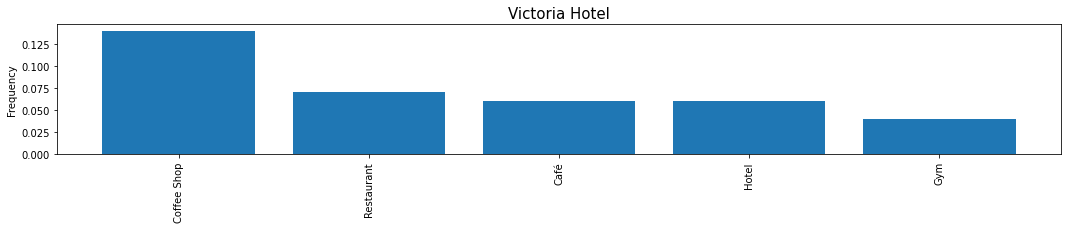

In [83]:

for i in range(len(downtown_toronto_grouped['Neighborhoods'])):
    hood = downtown_toronto_grouped['Neighborhoods'].iloc[i]
    temp = downtown_toronto_grouped[downtown_toronto_grouped['Neighborhoods'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq':2})
    temp = temp.nlargest(5,'freq')
    plt.figure(figsize=(18,100))
    ax = plt.subplot(35,1,i+1)
    x = np.linspace(1,5,5)
    ax.bar(temp['venue'],temp['freq'], align='center')
    ax.tick_params(axis='x',labelrotation=90)
    ax.set_ylabel('Frequency')
    ax.set_title('{}'.format(hood), fontsize=15)

# for hood in downtown_toronto_grouped['Neighborhoods']:
#     temp = downtown_toronto_grouped[downtown_toronto_grouped['Neighborhoods'] == hood].T.reset_index()
#     temp.columns = ['venue','freq']
#     temp.head()

In [84]:
from sklearn.cluster import KMeans
kclusters = 8

downtown_toronto_clustering = downtown_toronto_grouped.drop('Neighborhoods',1)

kmeans = KMeans(n_clusters=kclusters,random_state=42)
kmeans.fit(downtown_toronto_clustering)

KMeans(random_state=42)

In [114]:
num_top_venues = 10
cols = []
for i in range(num_top_venues):
    try:
        cols.append('{}{} Most Common Venue'.format(i+1, indicators[i]))
    except:
        cols.append('{}th Most Common Venue'.format(i+1))

downtown_toronto_venues_labeled = pd.DataFrame(columns=cols)
downtown_toronto_venues_labeled.insert(0,'Neighborhoods',downtown_toronto_sorted['Neighborhoods'])

for j in range(downtown_toronto_sorted.shape[0]):
    venues = dt_venues_grouped[dt_venues_grouped['Neighborhoods'] == downtown_toronto_sorted['Neighborhoods'].iloc[j]]
    venues_sorted = venues.nlargest(num_top_venues,'Venue')
    for k in range(num_top_venues): 
        try:
            downtown_toronto_venues_labeled.iloc[j,k+1] = venues_sorted.iloc[k,1]
        except:
            downtown_toronto_venues_labeled.iloc[j,k+1] = np.nan

            
downtown_toronto_venues_labeled.insert(1,'Cluster Labels', kmeans.labels_)            
downtown_toronto_venues_labeled.insert(2,'Total Venues',downtown_toronto_venues_total['Venue'])
downtown_toronto_venues_labeled.insert(1,'Latitude',downtown_toronto_sorted['Latitude'])
downtown_toronto_venues_labeled.insert(2,'Longitude',downtown_toronto_sorted['Longitude'])


downtown_toronto_venues_labeled.head()

,Neighborhoods,Latitude,Longitude,Cluster Labels,Total Venues,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adelaide,43.650571,-79.384568,4,92,Coffee Shop,Café,Restaurant,Clothing Store,Deli / Bodega,Gym,Hotel,Thai Restaurant,American Restaurant,Bakery
1,Bathurst Quay,43.628947,-79.394420,1,16,Airport Service,Airport Lounge,Airport Terminal,Airport,Airport Food Court,Bar,Boat or Ferry,Boutique,Harbor / Marina,Plane
2,Berczy Park,43.644771,-79.373306,4,59,Coffee Shop,Cocktail Bar,Bakery,Beer Bar,Cheese Shop,Farmers Market,Pharmacy,Restaurant,Seafood Restaurant,Art Gallery
3,CN Tower,43.628947,-79.394420,1,16,Airport Service,Airport Lounge,Airport Terminal,Airport,Airport Food Court,Bar,Boat or Ferry,Boutique,Harbor / Marina,Plane
4,Cabbagetown,43.667967,-79.367675,0,46,Café,Coffee Shop,Bakery,Chinese Restaurant,Italian Restaurant,Pharmacy,Pizza Place,Pub,Restaurant,American Restaurant


In [119]:
import matplotlib as mp

In [121]:
# create map
map_clusters = folium.Map(location=[downtown_toronto_latitude, downtown_toronto_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = mp.cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [mp.colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(downtown_toronto_venues_labeled['Latitude']+r_diff, downtown_toronto_venues_labeled['Longitude']+r_diff, downtown_toronto_venues_labeled['Neighborhoods'], downtown_toronto_venues_labeled['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters